**1. Data Preparation**

In [ ]:
#load the dataset
import pandas as pd
import numpy as np
xls = pd.ExcelFile('heart_disease.xlsx')
print(xls.sheet_names)
df = pd.read_excel(xls, sheet_name = 'Heart_disease')

['Description', 'Heart_disease']


**2. Exploratory Data Analysis (EDA)**

In [ ]:
#Basic Info
print(df.head())
print(df.info())
print(df.describe())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-n

In [ ]:
#Check for missing values
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


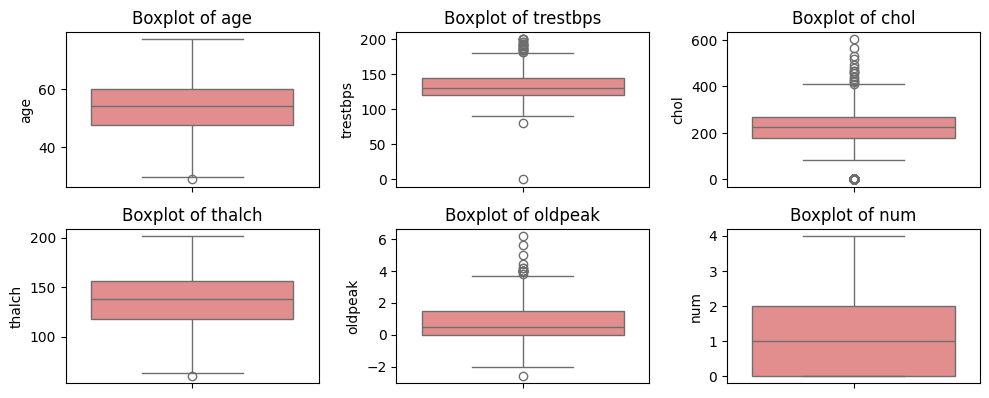

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Check for outliers (Using Boxplot)
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
#Check for duplicates and Inconsistencies
print(f"Duplicate rows: {df.duplicated().sum()}\n")

for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

Duplicate rows: 1

Unique values in sex: 2
Unique values in cp: 4
Unique values in restecg: 3
Unique values in exang: 4
Unique values in slope: 3
Unique values in thal: 3


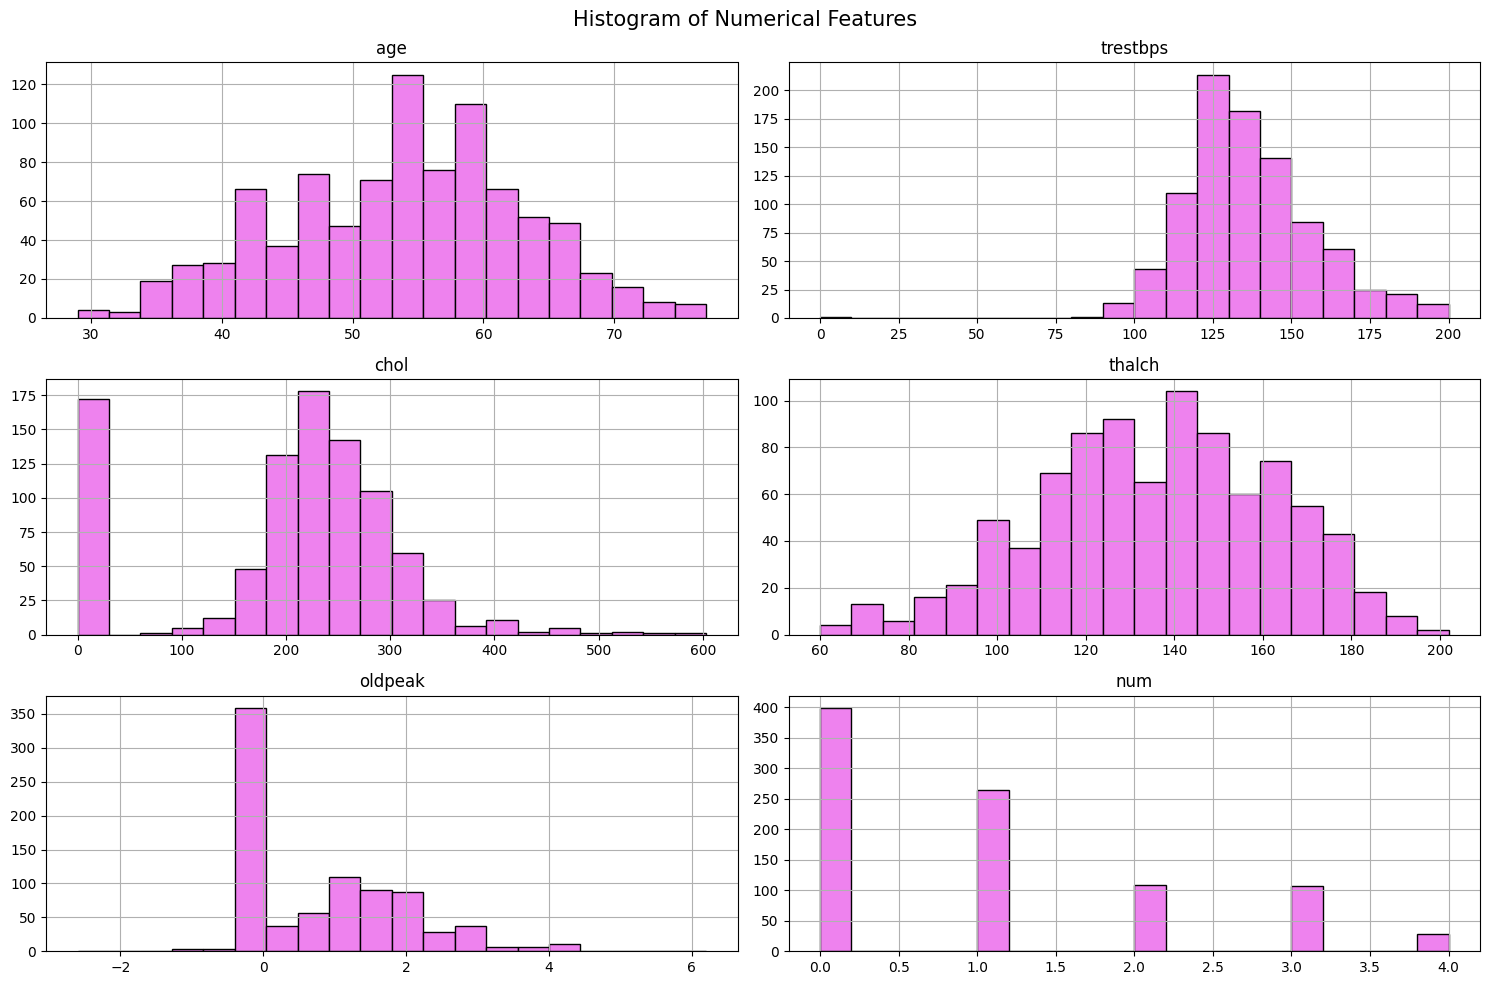

In [ ]:
#Histogram for feature distribution
numeric_cols = df.select_dtypes(include=['number']).columns

df[numeric_cols].hist(figsize=(15,10), bins=20, edgecolor='black', color='violet')
plt.suptitle("Histogram of Numerical Features", fontsize=15)
plt.tight_layout()
plt.show()

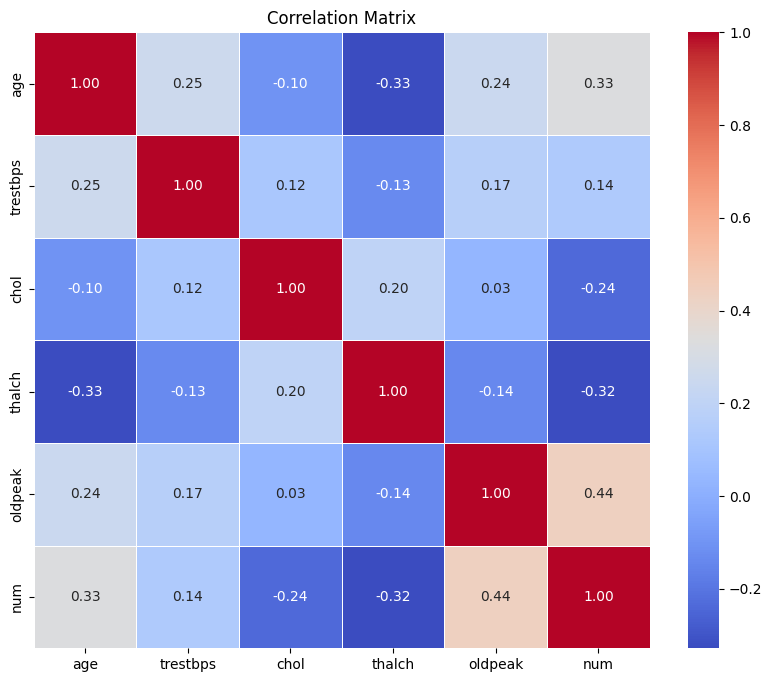

In [ ]:
#Correlation Matrix for feature relationship

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**3.  Feature Engineering**

In [ ]:
#Encoding

from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

#Apply Label Encoding for binary categorical columns
label_encoder = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    if df_encoded[col].nunique() == 2:
       le = LabelEncoder()
       df_encoded[col] = le.fit_transform(df_encoded[col])
       label_encoder[col] = le

#Apply One-Hot Encoding for non-binary categorical columns
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

In [ ]:
#Handling Missing Values

print(df_encoded.isnull().sum())

#Fill missing numeric values with median
for col in df_encoded.select_dtypes(include=['number']).columns:
    df_encoded[col].fillna(df_encoded[col].median())

#Fill missing categorical values with mode
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col].fillna(df_encoded[col].mode()[0])

age                         0
sex                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64


In [ ]:
#Scaling Numerical Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = df_encoded.select_dtypes(include=['number']).columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

**4. Decision Tree Classification**

Confusion Matrix:
[[64 21  2  2  0]
 [18 17  4  7  2]
 [ 5  9  2  4  2]
 [ 4  5  4  4  0]
 [ 2  1  1  1  1]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.69      0.72      0.70        89
           0       0.32      0.35      0.34        48
           1       0.15      0.09      0.11        22
           2       0.22      0.24      0.23        17
           3       0.20      0.17      0.18         6

    accuracy                           0.48       182
   macro avg       0.32      0.31      0.31       182
weighted avg       0.47      0.48      0.47       182

Accuracy: 0.4835164835164835
ROC-AUC Score: 0.5809327234502074


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


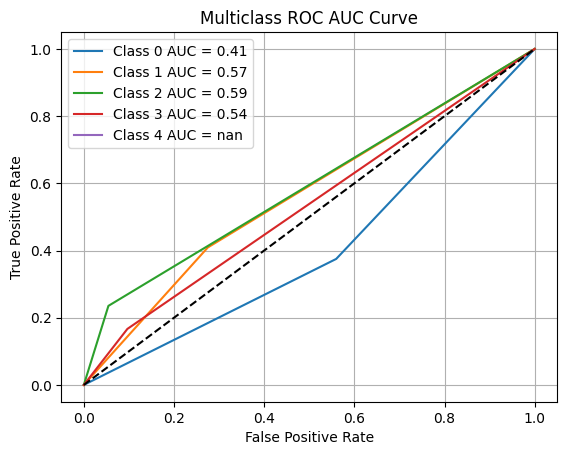

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

x = df_encoded.drop('num', axis=1)
y = df_encoded['num'].round().astype(int)


#Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predictions
y_pred = dtc.predict(X_test)
y_proba = dtc.predict_proba(X_test)  # Use full probabilities

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba, multi_class='ovr'))

# ROC Curve (for one class, e.g., class 1 vs rest — optional for multiclass)
from sklearn.preprocessing import label_binarize

# Binarize the output for plotting
y_test_bin = label_binarize(y_test, classes=list(range(y_proba.shape[1])))

# Plot ROC Curve for each class
for i in range(y_proba.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc_score(y_test_bin[:, i], y_proba[:, i]):.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC AUC Curve')
plt.legend()
plt.grid(True)
plt.show()



**5. Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
print(dict(zip(np.unique(y), class_weights)))
DecisionTreeClassifier(class_weight='balanced')

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dtc = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
        estimator=dtc,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:", classification_report(y_test, y_pred, zero_division=0))

{np.int64(-1): np.float64(0.45513784461152884), np.int64(0): np.float64(0.6852830188679245), np.int64(1): np.float64(1.6660550458715597), np.int64(2): np.float64(1.697196261682243), np.int64(3): np.float64(6.485714285714286)}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best CV Accuracy: 0.5592347661785546
Test Accuracy: 0.5659340659340659

Classification Report:               precision    recall  f1-score   support

          -1       0.69      0.72      0.70        89
           0       0.32      0.35      0.34        48
           1       0.15      0.09      0.11        22
           2       0.22      0.24      0.23        17
           3       0.20      0.17      0.18         6

    accuracy                           0.48       182
   macro avg       0.32      0.31      0.31       182
weighted avg       0.47      0.48      0.47       182



**6. Model Evaluation and Analysis**

**Accuracy:** 0.5659 (~56.6%)

Moderate Performance, but not strong.
Indicates potential underfitting (especially since you used max_depth=3).

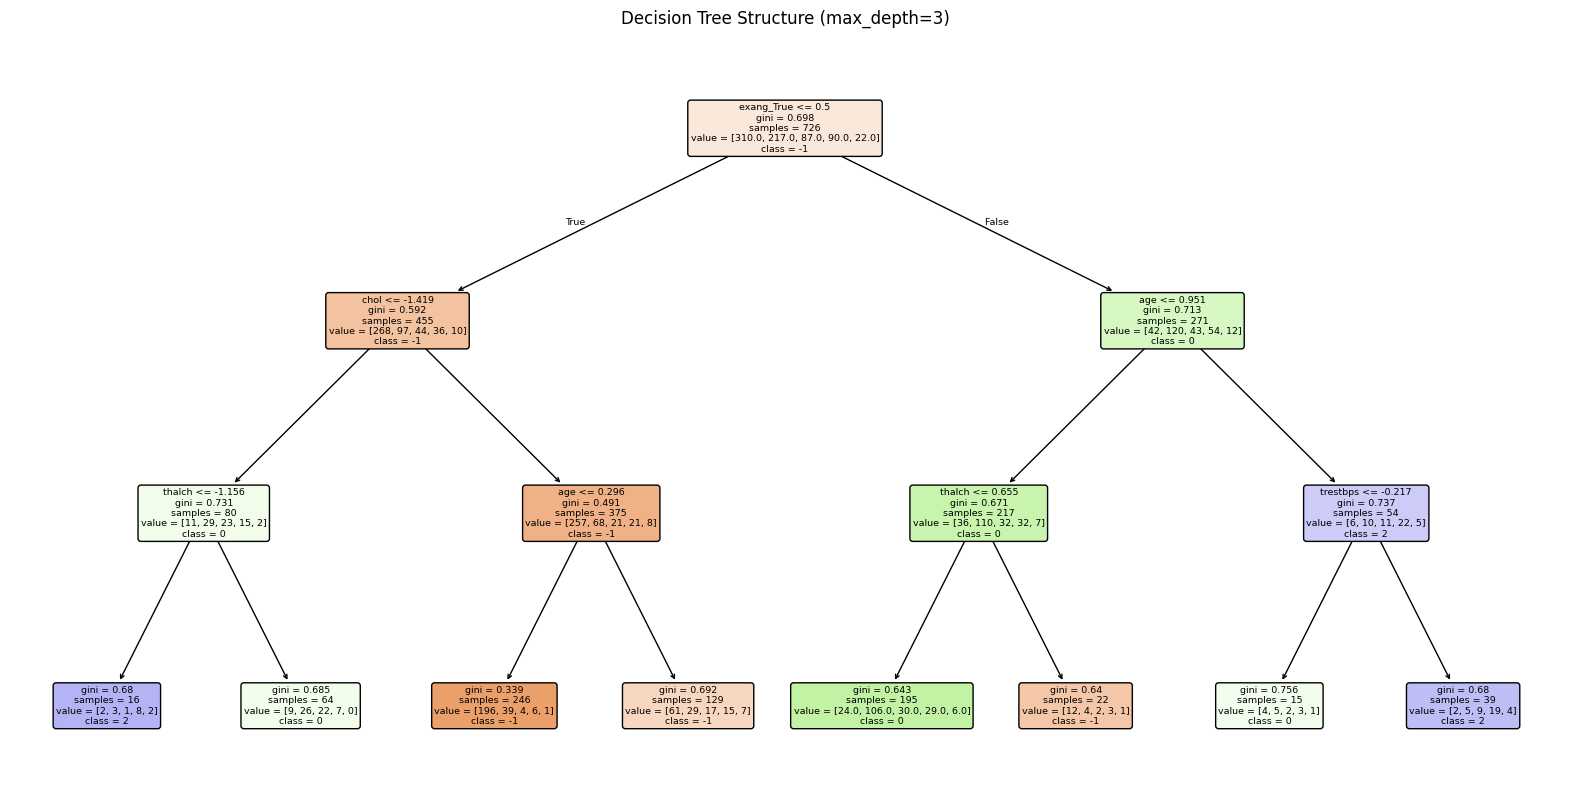

In [ ]:
#Visualize the Decision tree structure

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_model,
          feature_names=X.columns,
          class_names=[str(cls) for cls in sorted(y.unique())],
          filled=True,
          rounded=True)
plt.title("Decision Tree Structure (max_depth=3)")
plt.show()

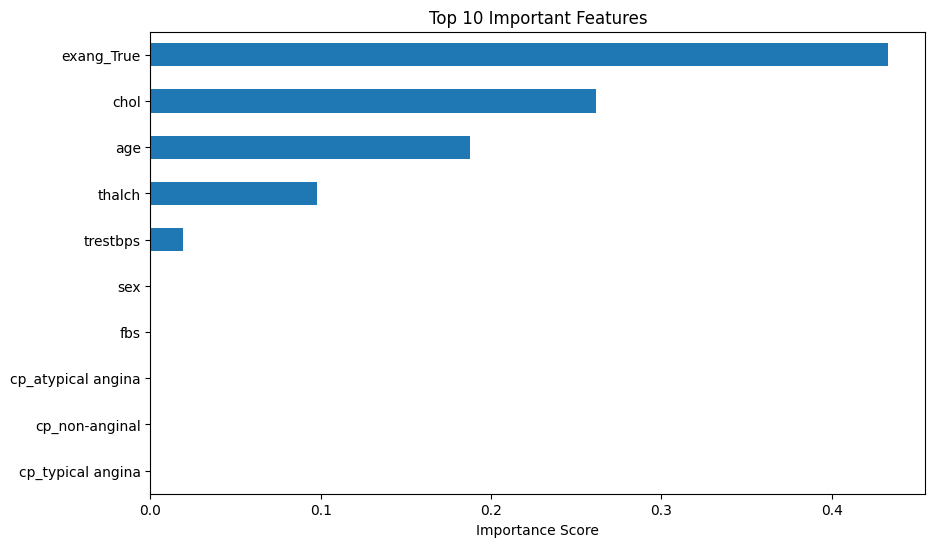

In [ ]:
#Feature Importance
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
importances_sorted.head(10).plot(kind='barh',figsize=(10,6), title='Top 10 Important Features')
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

**Interview Questions:**

1. . What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

**Answer:**
* max_depth - Limits the maximum depth of the tree.Helps prevent overfitting.
* min_sample_split - Higher values reduce overfitting by preventing splits that create small, specific branches.
* criterion - Choice can affect tree structure and decision boundaries.
* min_samples_leaf - Ensures leaves have enough data. Helps in smoothing the model and reducing overfitting.

2. What is the difference between the Label encoding and One-hot encoding?

**Answer:**
1. Label Encoding

* Assigns a unique integer to each category.
* Suitable for ordinal data (where order matters).
* Compact representation (only one column).
* Imposes ordinal relationship even when none exists.

2. One-Hot Encoding

* Creates a separate binary column for each category.
* Suitable for nominal data (no order).
* May lead to sparse data.
*  Increase dimensionality (especially with many categories).


